In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

1. Load the data

- Import pandas as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the dat folder, saving it as past.

- Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories.

In [11]:
past = pd.read_csv('../dat/past.csv.gz')
past.sample(3)
past.columns

# Total no of columns
print(f'Total number of features in the dataset are: {len(past.columns)}')


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
3332,5802676,4.818720e+08,2.166667,1.333333,807324.833333,5.790,5.691667,1.0,0.666667,0.5,...,0.166667,0.166667,0.0,0.0,0.333333,0.166667,0.333333,1,0.0,1.333333
1288,5930768,5.957735e+08,2.000000,1.000000,28.000000,0.715,0.715000,1.0,0.000000,1.0,...,0.000000,0.500000,0.0,0.5,0.000000,0.000000,0.000000,0,0.0,1.000000
3772,5877107,5.607741e+08,2.000000,2.000000,299.000000,6.900,6.900000,0.0,2.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0,0.0,1.000000


Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

Total number of features in the dataset are: 37


2. What percentage of interaction resulted in purchase ?

- Q1. Do people mostly buy what they look for or 'Window Shopping'
- Q2. Is the class data balanced ?

In [14]:
# Percentage of rows that resulted in purchase vs non-purchase
past['Purchased?'].value_counts() / past.shape[0]

print('A1. Approx - 66 % of peoplae are involved in window shopping')
print('A2. The data is imbalanced')

0    0.6562
1    0.3438
Name: Purchased?, dtype: float64

A1. Approx - 66 % of peoplae are involved in window shopping
A2. The data is imbalanced


3. Droping the `product_id` and `user_id` columnn from the dataset. 

- Save the features columns in dataframe `X` and label column in dataframe `y`

In [16]:
print(f'The shape of the original dataset : {past.shape}')
X = past.drop(columns=['product_id','user_id'], axis=1)
print(f'The shape of X {X.shape}')

y = X.pop('Purchased?') # It will remove the Purchased Columns from X dataframe and put in y dataframe
print(f'The final shape of features and label datasets {X.shape, y.shape}')

# Test function
assert X.shape == (5000, 34)
assert y.shape == (5000, )

The shape of the original dataset : (5000, 37)
The shape of X (5000, 35)
The final shape of features and label datasets ((5000, 34), (5000,))


4. Apply `PCA` to reduce the number of features to 5 and save the output in a numpy array `X_reduced`

- Q1. Do we need to pre-process the data by Min Max Scaling ?
- Q2. Does mean centering or feature scaling effect the PCA ?

4.1 PCA Analysis without scaling

The explained ratio is [1.00 0.00 0.00 0.00 0.00]
All the explained variance has been associated with just one PCA


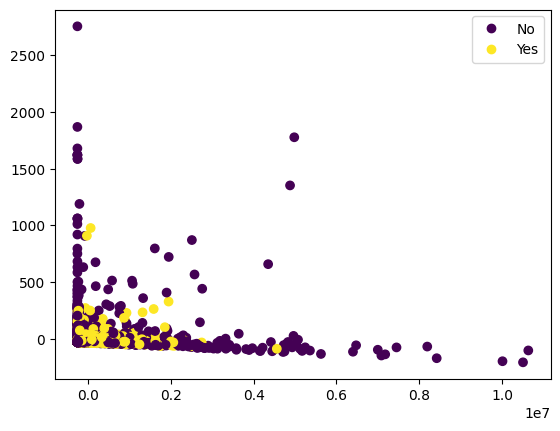

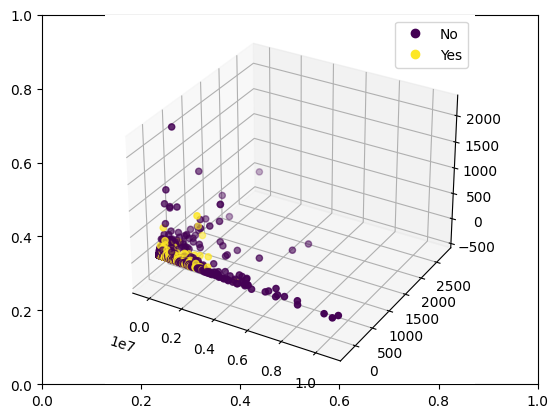

In [23]:
# Imports
from sklearn.decomposition import PCA

# without sclaing
pca = PCA(n_components=5, random_state=0).fit(X)
X_reduced_no_scaling = pca.transform(X)

# Test the shape
assert X_reduced_no_scaling.shape == (5000, 5)

# Print out the %age of variance explained by the PCA Components
np.set_printoptions(precision=2, suppress=True, floatmode='fixed')
print(f'The explained ratio is {pca.explained_variance_ratio_}')
print('All the explained variance has been associated with just one PCA')

# Visualise the few PCA Components
def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:, 0], pcs[:, 1], c=y)
    ax.legend(
        handles=plot.legend_elements()[0],
        labels=['No', 'Yes']
    )

def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:, 0], pcs[:, 1], pcs[:, 2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0],
        labels=['No', 'Yes']
    )

visualize_2pcs(X_reduced_no_scaling, y)
visualize_3pcs(X_reduced_no_scaling, y)

4.2 Versus PCA Analysis with Min-Max Scaling

The explained ratio is [0.10 0.09 0.07 0.05 0.04]
All the explained variance has been associated with more than two or three PCA


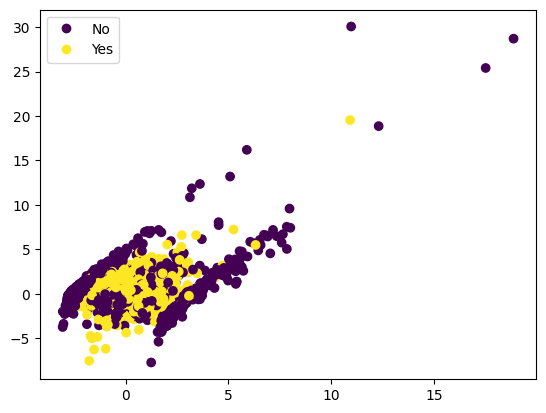

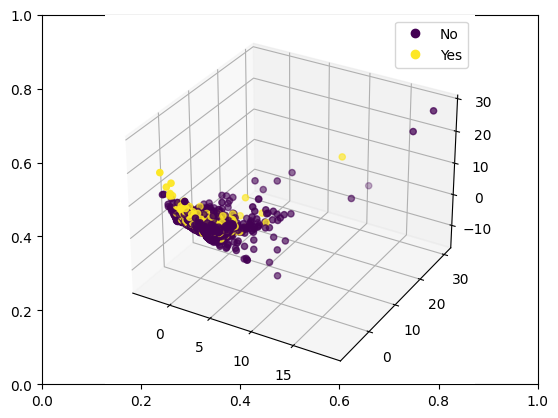

In [25]:
# Imports
from sklearn.preprocessing import StandardScaler

# without sclaing
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5, random_state=0).fit(X_scaled)
X_reduced_with_scaling = pca.transform(X_scaled)

# Test the shape
assert X_reduced_with_scaling.shape == (5000, 5)

# Print out the %age of variance explained by the PCA Components
np.set_printoptions(precision=2, suppress=True, floatmode='fixed')
print(f'The explained ratio is {pca.explained_variance_ratio_}')
print('All the explained variance has been associated with more than two or three PCA')

visualize_2pcs(X_reduced_with_scaling, y)
visualize_3pcs(X_reduced_with_scaling, y)

5. Compare the analysis of PCA with groundtruth. The prediction performance using given reduced features (engineered) vs non-engineered features

- Build a wrapper function 
    - Takes features, target, and a boolean parameter indicating whether to include standardization or not
    - Split the data in train (80 %) and test (20 %) and `random_state=0`
    - A `Pipeline` that preprocess the data `StandardScaler` , if True then do otherwise `pass` and apply `LogisticRegression`
    - Fit the `Pipeline` on training data
    - Print the `sklearn.metrics.classification_report` on test data



In [30]:
# Usual Imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


def train(X, y, standardize=True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    scaler = StandardScaler()
    logistic = LogisticRegression(class_weight='balanced')
    if standardize==True:
        pipe = Pipeline(steps=[('scaler', scaler), ('logistic', logistic)])
    else:
        pipe = Pipeline(steps=[('logistic', logistic)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
train(X, y)
train(X_reduced_no_scaling, y, standardize=False)
train(X_reduced_with_scaling, y, standardize=False)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       649
           1       0.65      0.44      0.52       351

    accuracy                           0.72      1000
   macro avg       0.69      0.65      0.66      1000
weighted avg       0.71      0.72      0.70      1000

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.66      0.65      0.65      1000


The metrics and ac

> The metrics and accuracy generally slightly decreased a few points when using pca. 
As a con, it appears that some useful data was left out when reducing the number of dimensions in the feature space 
and in fact only ~35% of the explained variance was captured. 

> As a pro, the reduced dimensionality of the feature space may produce a better model, 
will allow for a more efficient convergence, and will possibly help mitigate against overfitting to some degree